# Estructuras de datos vs. tipos de dato abstractos

**Matemáticas Discretas para Ciencias de Datos**

Prof. Leonardo Ignacio Martínez Sandoval

## Introducción

En entradas anteriores discutimos acerca de algoritmos para ordenar. Vimos varias formas de ordenar objetos en tiempo cuadrático: `SelectionSort`, `InsertionSort` y `BubbleSort`. Se puede ordenar en tiempo más rápido, pero antes de ver cómo, es importante revisar otros conceptos.

En esta entrada hablaremos de tipos de dato abstractos y de estructuras a datos. A grandes rasgos, un tipo de dato abstracto es un objeto abstracto que guarda cierta información y que tiene ciertos métodos. Una estructura de datos es la manera en la cuál usamos los recursos de una computadora para implementar un tipo de dato abstracto. Dependiendo de qué estructura de datos usemos, es posible que distintos métodos tengan distintas complejidades.

## Tipos de dato abstractos

A grandes rasgos, un **tipo de dato abstracto** es un objeto que guarda cierta información y que tiene ciertas **operaciones** que nos permiten hacer cosas con esa información. Es posible formalizar esto mucho más mediante teoría de ciencias de la computación, pero por ahora nos quedaremos con esta idea intuitiva y pensaremos en algunos ejemplos.

Un ejemplo de un tipo de dato abstracto es una `Lista`, que consiste de una colección de objetos de cierto universo en donde nos importa en qué orden están colocados, y en donde se permite tener objetos repetidos. Así, queremos que el tipo de dato `Lista` permita tener colecciones como las siguientes:

```
['Casa', 'Computadora', 'Perro']
[5,5,5,5,5,5]
[3,4,6,9,20]
[4,6,9,20,3]
[Cierto, Cierto, Falso]
[5]
```

La tercera y cuarta `Listas` son distintas pues si bien coinciden en los elementos que tienen, su orden es diferente. La segunda y quinta `Listas` son diferentes pues aunque tienen los mismos elementos, no los tienen en la misma cantidad.

Algunas operaciones que queremos poder ejecutar en una `Lista` son las siguientes:

- Una operación que nos diga si una `Lista` está vacía.
- Una operación que nos permita agregar un elemento al final una `Lista`.
- Una operación que nos permita agregar un elemento en alguna posición arbitraria de una `Lista`.
- Una operación que nos permita eliminar un elemento de una `Lista`.
- Una operación que nos permita leer el elemento en la posición $k$ de una `Lista`.
- Etcétera.

Cada una de estas operaciones se traduce en problemas algorítmicos que queremos resolver. 

*Ejemplo.* La operación de leer un elemento de la `Lista` se puede plantear como un problema algorítmico como sigue:

**Problema.** Leer elementos.

**Entrada.** Una `Lista` $L$ y una posición $k$.

**Salida.** El elemento en la posición $k$ de la lista (si existe) o bien un error de que excedimos el tamaño de la lista.

Si como entrada tenemos a la lista `L=['Queso', 'pan', 'vino']`, al entero $k=2$, y estamos suponiendo que las posiciones empiezan en $0$,  entonces como respuesta deberíamos obtener `'vino'`.

<div style="text-align:right">$\square$</div>

## Estructuras de datos

Una `Lista` es algo meramente abstracto. Podríamos implementar `Listas` con hojas de papel. No sería necesaria una computadora para ello. La forma concreta en la cual se implementa un tipo de dato abstracto se conoce como **estructura de datos**. Aunque esto podría quedarse también a un nivel de discusión puramente teórico, al pensar en estructuras de datos ahora sí estamos pensando en la manera en la que la computadora almacenará la información que queremos.

Vale la pena recordar un poco de la manera en la cual la computadora almacena la información. Muy a grandes rasgos, cuando usamos memoria (ya sea disco duro, o RAM), lo que sucede es que los objetos se almacenan con ciertas "direcciones" o en ciertas "casas". Puedes pensar que un bloque de memoria se ve algo así:

```
...
111432 - "perro"
111433 - "casa"
111434 - 524560
111435 - 25681
111436 - "mamífero"
111437 - 8341
111438 - True
111439 - 83442
...
```

Aquí en cada una de estas "casas" estamos almacenando un objeto, aunque en la realidad esto es algo impreciso. De cualquier forma, nos ayudará para darnos una buena idea de lo que está sucediendo.

Cuando queremos leer objetos en memoria, típicamente lo que hacemos es consultar una tabla que nos diga en qué lugar de la memoria los podemos encontrar. Quizás una variable `mascota` tiene valor "perro" y para ello se debe llevar el registro de que el valor de esta variable está disponible en la dirección $111432$ de la memoria.




## Estructuras de datos para `Listas`

Teniendo en mente cómo funciona la memoria de la computadora, hay más de una forma de representar a las `Listas` usando estos recursos.

Una primer forma es utilizando la estructura de datos de **arreglos**. Para hacer esto, lo que se hace es decirle desde un inicio a la computadora que reserve espacio consecutivo en la memoria para almacenar toda la `Lista`. Así, si ya sabemos que la `Lista` tiene, por ejemplo, longitud 7, entonces la computadora haría más o menos algo del siguiente estilo:

```
...
123432 - 43115
123433 - reservado para la lista
123434 - reservado para la lista
123435 - reservado para la lista
123436 - reservado para la lista
123437 - reservado para la lista
123438 - reservado para la lista
123439 - reservado para la lista
123440 - "ojo"
123441 - 5692
...
```

Si quisiéramos guardar los objetos de la `Lista`, podemos guardarlos uno por uno y si nuestro algoritmo hace las cosas bien, dejaría la `Lista` bien puesta, de la siguiente manera:

```
...
123432 - 43115
123433 - a_1
123434 - a_2
123435 - a_3
123436 - a_4
123437 - a_5
123438 - a_6
123439 - a_7
123440 - "ojo"
123441 - 5692
...
```

Si recordamos que la `Lista` comienza en $ 123433$, entonces es muy fácil leer el resto de los elementos. Por ejemplo, el a_4 está en la "casa" $123433+3=123436$. Esto nos da una forma de implementar la operación de leer elementos en tiempo $O(1)$. Pero tiene la desventaja de que nuestra lista debe tener longitud fija.

Una segunda forma de implementar una `Lista` es mediante la estructura de datos de **listas enlazadas**. La idea de cómo funcionan es la siguiente. En vez de reservar espacio consecutivo en la memoria para almacenar la `Lista`, lo que se hace es almacenar el primer elemento en alguna posición de la memoria, no importa cuál. Y luego, se utiliza el siguiente de la memoria para o bien indicar que la lista terminó (digamos, con un indicador de `False`), o bien para decir dónde está la ubicación de la memoria del siguiente elemento. Así, tras algunas operaciones una lista podría quedar en memoria así:

```
...
282930 - a_2
282931 - False
...
323455 - a_0
323456 - 725113
...
725113 - a_1
725114 - 282930
```

Si nos acordamos que la lista comienza en $323455$, entonces podemos recuperar todos los elementos: el primero es $a_0$. Luego, tenemos que leer la posición $323455$ para saber que el siguiente elemento lo encontraremos en la "casa" $725113$. Lo vamos a buscar ahí y nos damos cuenta que es $a_1$. Luego en $725114$ nos damos cuenta que el siguiente está en $282930$. Nos vamos ahí y nos damos cuenta que es $a_2$. Finalmente, vamos a la posición de memoria $282931$ que nos dice `False`, lo cual indica que ya terminó la lista. Así, recuperamos todos los elementos de la lista.

Aquí no hay límites con respecto a la longitud de la lista, más allá de los establecidos por la cantidad de memoria disponible. Si queremos agregar un nuevo elemento a la lista, basta leer la lista para saber dónde está el último elemento. Nos damos cuenta que es en $282930$. Si quisiéramos agregar ahora un elemento $a_3$, buscamos algún lugar disponible en la memoria, digamos el $112233$ y ahí ponemos $a_3$. Cambiamos el valor en $282931$ de `False` a $112233$ y ponemos `False` en $112234$.

En contrapeso, nuestras lecturas ya no las podemos hacer en tiempo $O(1)$ como en los arreglos. Si nos pidieran encontrar el $n$-ésimo elemento de una lista con $n$ elementos, ahora tomaríamos tiempo $O(n)$.

## Arreglos dinámicos vs. listas enlazadas

Mediante algunos trucos en los cuales no profundizaremos, es posible crear una estructura de datos que se llama **arreglo dinámico**, el cual tiene la ventaja de los arreglos de tener tiempo de lectura $O(1)$ y la ventaja de las listas enlazadas de poder alargarse. Incluso teniendo estas ventajas, siguen existiendo diferencias importantes de las complejidades de las operaciones en arreglos dinámicos vs. listas enlazadas.

¿Qué tal para encontrar el mínimo de la `Lista`? De entrada podría parecer que necesitamos tiempo $O(n)$ para encontrarlo en cualquiera de los casos. Sin embargo, podemos ser más astutos que esto. En cualquiera de las estructuras de datos podemos reservar un espacio de memoria adicional para indicar cuál es el número mínimo y cuántas veces aparece. Al ir agregando elementos a la lista (o al quitarlos) podemos actualizar estas cantidades. Esto nos permitiría trabajar con `Listas` en donde encontrar el mínimo toma tiempo constante.

Entonces, ¿qué es mejor? ¿una lista enlazada o un arreglo dinámico? Depende mucho de la aplicación que se necesite. Si se agregarán elementos constantemente al inicio de la `Lista`, entonces probablemente sea mejor usar una lista enlazada. Si la mayoría de las operaciones serán de lectura, quizás sea mejor usar un arreglo. Si estás trabajando en un lenguaje de programación específico, es posible que ya tenga una estructura de datos muy flexible y con lo mejor de ambos mundos, como las listas de Python.

## Una simulación de listas enlazadas vs. arreglos

A continuación mostramos una implementación de listas enlazadas y una de arreglos con dos operaciones muy sencillas: agregarles objetos y leer el objeto en cierta posición $k$. Para simplificar las cosas, supondremos que únicamente recibirán enteros no negativos. Se usa programación orientada a objetos en Python.

In [51]:
class Node():
    def __init__(self,value):
        self.next=None
        self.value=value

class LinkedList():
    def __init__(self):
        self.empty=True
        self.first=None
        self.last=None
        
    def append(self,value):
        new_node=Node(value)
        if self.empty==True:
            self.first=new_node
            self.last=new_node
            self.empty=False
        else:
            self.last.next=new_node
            self.last=new_node
        
    def peek(self,k):
        if k<0 or type(k)!=int:
            return("Error de índice")
        node=self.first
        for j in range(k):
            node=node.next
        try:
            return(node.value)
        except:
            return("Error de índice")
        
class Array():
    def __init__(self,long):
        self.long=long
        self.items=long*[-1]
        
    def set_value(self,index,value):
        if index<0 or index>self.long or type(index)!=int:
            return("Error de índice")
        else:
            self.items[index]=value
        
    def peek(self,index):
        if index<0 or index>self.long or type(index)!=int:
            return("Error de índice")
        else:
            return self.items[index]

Hagamos una simulación para ver qué tan rápido corren las operaciones de escritura y lectura de una `Lista` en cada una de estas estructuras de datos. Supongamos que para ciertos $k$ de $1$ a $5000$ queremos construir una `Lista` con los enteros de $1$ a $k$, y luego leer la entrada en la posición $\lfloor k/2\rfloor$.

Haremos esto con la estructura de datos `LinkedList` y con la estructura de datos `Array` por separado. Tomaremos el tiempo que requiere esto para cada $k$ y luego lo graficaremos. Como el tiempo varía mucho debido a ciertos procesos numéricos, más bien calcularemos un moving average de ventana 200.

In [97]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

list_tiempos_w=[]
list_tiempos_r=[]
array_tiempos_w=[]
array_tiempos_r=[]

# Crear las listas con listas enlazadas y leer el elemento de enmedio
for k in range(1,5000,10):
    a=datetime.now()
    list_ej=LinkedList()
    for j in range(k):
        list_ej.append(k+1)
    b=datetime.now()
    list_tiempos_w.append((b-a).total_seconds())
    a=datetime.now()
    list_ej.peek(int(k/2))
    b=datetime.now()
    list_tiempos_r.append((b-a).total_seconds())

# Crear las listas con arreglos y leer el elemento de enmedio
for k in range(1,5000,10):
    a=datetime.now()
    array_ej=Array(k) #Array necesita que le demos el tamaño
    for j in range(k):
        array_ej.set_value(j,j+1)
    b=datetime.now()
    array_tiempos_w.append((b-a).total_seconds())
    a=datetime.now()
    array_ej.peek(int(k/2))
    b=datetime.now()
    array_tiempos_r.append((b-a).total_seconds())

Text(0, 0.5, 'Tiempo de escritura (seg.)')

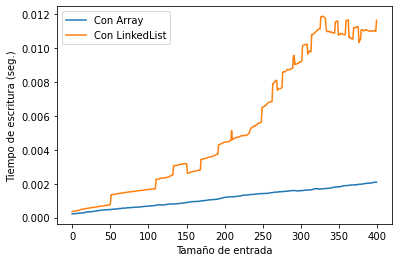

In [98]:
# Hacemos moving averages para que se vea un poco más estable.
array_tiempos_w_mav=(np.cumsum(array_tiempos_w)[100:]-np.cumsum(array_tiempos_w)[:-100])/100
list_tiempos_w_mav=(np.cumsum(list_tiempos_w)[100:]-np.cumsum(list_tiempos_w)[:-100])/100

plt.plot(array_tiempos_w_mav, label='Con Array')
plt.plot(list_tiempos_w_mav, label= 'Con LinkedList')
plt.legend()
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo de escritura (seg.)")

En ambos casos el tiempo de escritura parece estar corriendo en tiempo lineal. Esto tiene sentido: hay que escribir $O(n)$ números y en ambas estructuras de datos esto puede hacerse en tiempo lineal. Sin embargo, parece ser que la constante para `LinkedLists` es peor.

Text(0, 0.5, 'Tiempo de lectura (seg.)')

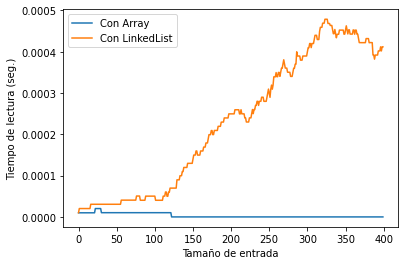

In [99]:
array_tiempos_r_mav=(np.cumsum(array_tiempos_r)[100:]-np.cumsum(array_tiempos_r)[:-100])/100
list_tiempos_r_mav=(np.cumsum(list_tiempos_r)[100:]-np.cumsum(list_tiempos_r)[:-100])/100

plt.plot(array_tiempos_r_mav, label='Con Array')
plt.plot(list_tiempos_r_mav, label= 'Con LinkedList')
plt.legend()
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo de lectura (seg.)")

Aquí es donde las estructuras de datos difieren por mucho. En el caso de `Array`, el tiempo de lectura es $O(1)$, que en efecto se traduce a prácticamente un tiempo de lectura instantáneo. Por otro lado, para leer elementos en `LinkedList` necesitamos hacer $O(n)$ operaciones.

## Tarea moral

Los siguientes problemas te ayudarán a practicar lo visto en esta entrada. Para resolverlos, necesitarás usar herramientas matemáticas, computacionales o ambas.
 
1. Simula manualmente qué es lo que sucede cuando creas la `Lista` con los elementos `[4,1,7,8]` y lees el elemento en la posición $3$. Tu respuesta dependerá de si estas implementando la `Lista` como lista enlazada o como arreglo.
2. Explica cómo resolverías el problema algorítmico de agregar un elemento $x$ entre la posición $k$ y $k+1$ de una lista enlazada $L$. ¿En qué tiempo de ejecución puedes hacerlo? Y en el caso de arreglos dinámicos, ¿cómo lo harías y en qué tiempo de ejecución podrías hacerlo?
3.Investiga acerca de los tipos de dato abstractos `Stack` y `Queue`. ¿Qué información guardan y qué operaciones queremos realizar usualmente en ellos? Explica cómo se diferencías entre ellos y por qué las estructuras de datos de listas enlazadas y de arreglos permiten implementarlas. ¿Qué ventaja tiene una implementación o la otra?
4. Explica cómo encontrar el mínimo de una lista enlazada o de un arreglo en tiempo $O(n)$. Luego, explica cómo implementarías una operación de mínimo que tome tiempo $O(1)$, suponiendo que nunca se eliminaran elementos. Para ello, deberás almacenar el mínimo en una variable.
5. Extiende las clases `LinkedList` y `Array` que dimos para que tengan operaciones de agregar elementos al inicio y de eliminar el elemento del inicio. Realiza simulaciones para comparar ambas implementaciones.